1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Loading Data

In [2]:
df = pd.read_csv("heart.csv")

3.Data Exploration

df.head(): Displays the first few rows to understand the data structure.

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


df.info():
 Provides a summary of the DataFrame, including column names, non-null counts, and data types.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


df.describe(): Generates descriptive statistics of the numerical columns.

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


df.shape: Shows the number of rows and columns in the DataFrame

In [6]:
df.shape

(303, 14)

df.isnull().sum(): Checks for and counts missing values in each column.

In [7]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


df.target.value_counts(): Displays the distribution of the target variable

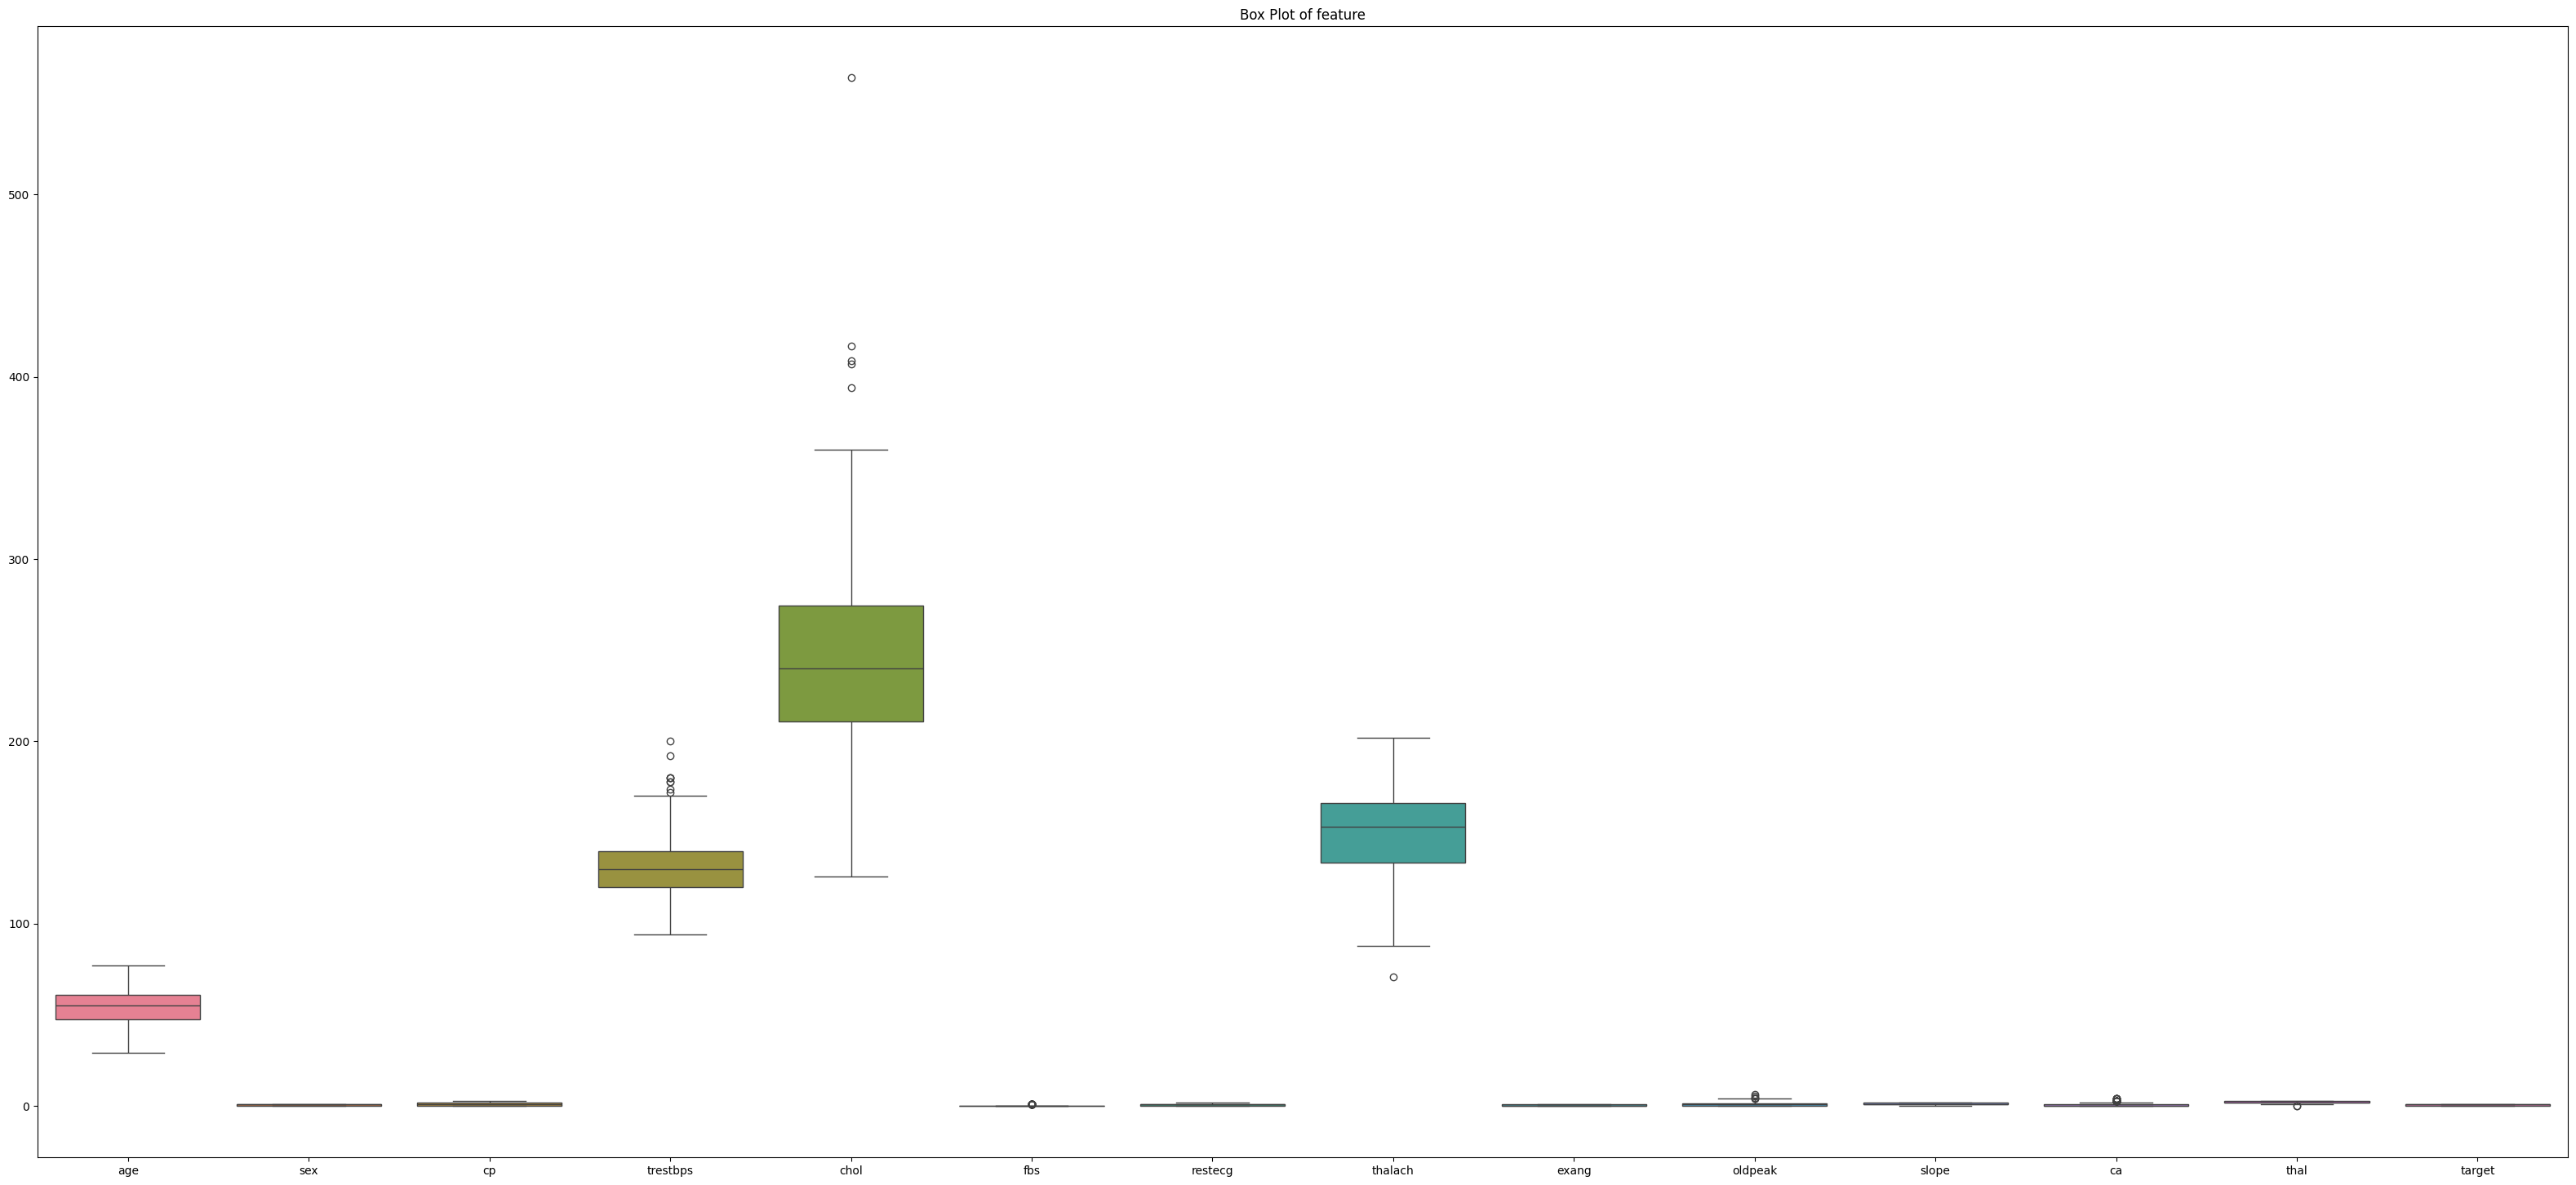

In [8]:
plt.figure(figsize=(40, 18))
sns.boxplot(df)
plt.title('Box Plot of feature')
plt.show()

In [9]:
# Checking the outlier counts
def outlier_count(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return len(outliers)

cols = ['trestbps', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']
for col in cols:
    outlier_num = outlier_count(df, col)
    print(f"Number of outliers in {col}: {outlier_num}")

Number of outliers in trestbps: 9
Number of outliers in fbs: 45
Number of outliers in thalach: 1
Number of outliers in oldpeak: 5
Number of outliers in ca: 25
Number of outliers in thal: 2


In [10]:
#Capping the outliers to lower or upper bound
def cap_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

cols = ['trestbps', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']
for col in cols:
    df = cap_outliers(df, col)

In [11]:
df.target.value_counts()

,count
target,
1,165
0,138


3. Handle Class Imbalance

In [12]:
X=df.drop('target',axis=1)
y=df['target']

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [15]:
# XGBoost-based feature selection (Top 10)
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X, y)

import pandas as pd
feature_importances = pd.Series(xgb.feature_importances_, index=X.columns)
top_10_features = feature_importances.sort_values(ascending=False).head(10).index.tolist()
print("Top 10 Selected Features by XGBoost:", top_10_features)

Top 10 Selected Features by XGBoost: ['cp', 'ca', 'thal', 'slope', 'exang', 'sex', 'oldpeak', 'restecg', 'age', 'thalach']


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:25:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [16]:
# Keep only top 10 features
X = X[top_10_features]

4. Split Data and Suppress Warnings

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [18]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

 6.Train and Evaluate Models

In [20]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVC": SVC(random_state=42)
}

In [21]:
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print("-" * 30)


Training Logistic Regression...
Logistic Regression - Accuracy: 0.8675, Precision: 0.8511, Recall: 0.9091, F1 Score: 0.8791
------------------------------
Training Random Forest...
Random Forest - Accuracy: 0.8434, Precision: 0.8298, Recall: 0.8864, F1 Score: 0.8571
------------------------------
Training Decision Tree...
Decision Tree - Accuracy: 0.7590, Precision: 0.7727, Recall: 0.7727, F1 Score: 0.7727
------------------------------
Training SVC...
SVC - Accuracy: 0.6265, Precision: 0.6275, Recall: 0.7273, F1 Score: 0.6737
------------------------------


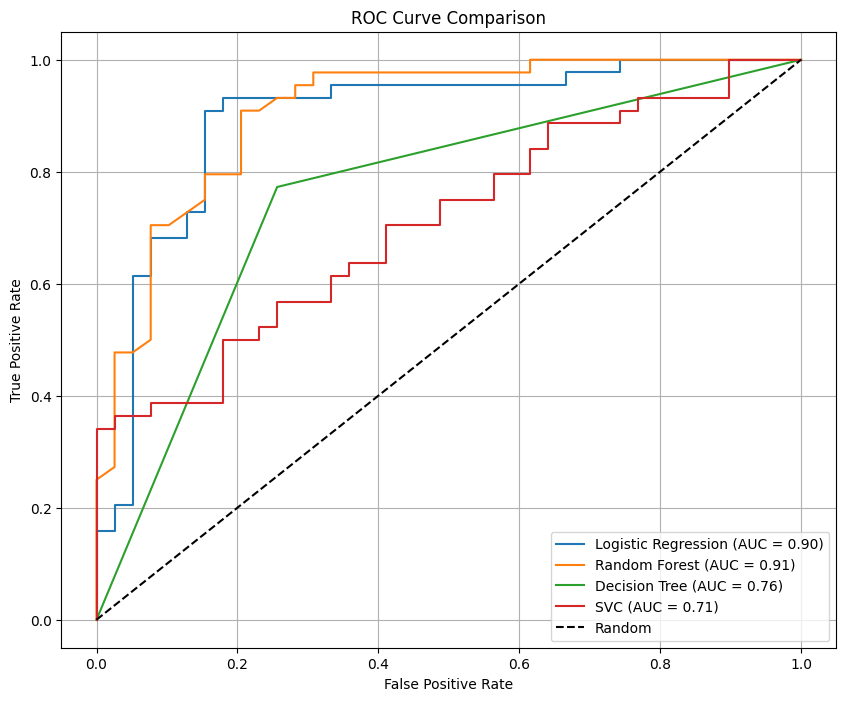

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Get probability scores (needed for ROC curve)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"): # For models like SVC
        y_proba = model.decision_function(X_test)
    else:
        # Skip models that don't provide probabilities or decision functions
        print(f"Skipping ROC curve for {name} (no predict_proba or decision_function)")
        continue

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random') # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

7. Save Models

In [23]:
import pickle

# Get the trained Random Forest model
random_forest_model = models["Random Forest"]

# Save the Random Forest model to a pickle file
filename_rf = 'random_forest_Heart_Disease_model.pkl'
pickle.dump(random_forest_model, open(filename_rf, 'wb'))

print(f"Random Forest model saved to {filename_rf}")

Random Forest model saved to random_forest_Heart_Disease_model.pkl
